## Tutorial 10

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

path = "../../src/"

crab = pd.read_table(path + "data/crab.txt", sep=" ")
crab

,color,spine,width,satell,weight
0,3,3,28.3,8,3.050
1,4,3,22.5,0,1.550
2,2,1,26.0,9,2.300
3,4,3,24.8,0,2.100
4,4,3,26.0,4,2.600
...,...,...,...,...,...
168,4,3,26.1,3,2.750
169,4,3,29.0,4,3.275
170,2,1,28.0,0,2.625
171,5,3,27.0,0,2.625


In [7]:
model = ols('weight ~ width * C(spine)', data=crab).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sun, 04 May 2025   Prob (F-statistic):           7.29e-56
Time:                        10:35:44   Log-Likelihood:                -12.072
No. Observations:                 173   AIC:                             36.14
Df Residuals:                     167   BIC:                             55.06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.6591    

In [12]:
model.pvalues['Intercept']

np.float64(4.6279383098695486e-17)

In [14]:
model.params['width:C(spine)[T.2]']

np.float64(-0.07242783759345878)

In [15]:
model.ssr

np.float64(11.646207241101141)

In [16]:
model.rsquared

np.float64(0.7966395537434964)

In [17]:
model.rsquared_adj

np.float64(0.7905509176280322)

In [24]:
new_df = sm.add_constant(pd.DataFrame({'width' : [27], 'spine' : [1]}), has_constant='add')
predictions_out = model.get_prediction(new_df)
predictions_out.predicted
model.predict(new_df, )

0    2.64906
dtype: float64

In [25]:
Cars93 = pd.read_csv(path + "data/Cars93.csv")

/var/folders/qf/kcn317s12j10nk3x4wvcv_w40000gn/T/ipykernel_2508/25061887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.rename(columns={'MPG.city': 'MPG_city'}, inplace=True)


MPG_city    Axes(0.125,0.11;0.775x0.77)
dtype: object

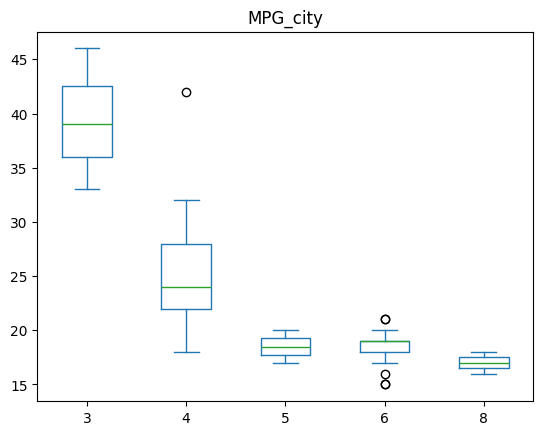

In [36]:
cars = Cars93[Cars93.Cylinders != "rotary"]
cars.rename(columns={'MPG.city': 'MPG_city'}, inplace=True)
cars.plot.box(column='MPG_city', by='Cylinders')

In [32]:
cars

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


In [42]:
anova_model = ols('MPG_city ~ C(Cylinders, Treatment)', data=cars).fit()
lm_model = ols('MPG_city ~ Cylinders', data=cars).fit()
anova_tab = sm.stats.anova_lm(anova_model, type=3,)
print(anova_model.summary())

                            OLS Regression Results                            
Dep. Variable:               MPG_city   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     41.15
Date:                Sun, 04 May 2025   Prob (F-statistic):           2.56e-19
Time:                        10:58:34   Log-Likelihood:                -240.05
No. Observations:                  92   AIC:                             490.1
Df Residuals:                      87   BIC:                             502.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [43]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:               MPG_city   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     41.15
Date:                Sun, 04 May 2025   Prob (F-statistic):           2.56e-19
Time:                        10:58:38   Log-Likelihood:                -240.05
No. Observations:                  92   AIC:                             490.1
Df Residuals:                      87   BIC:                             502.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.3333      1.952     20.

In [44]:
pop = pd.read_csv(path + "data/sg_population.csv")
pop

,Data Series,Total Population
0,2023,5917648
1,2022,5637022
2,2021,5453566
3,2020,5685807
4,2019,5703569
...,...,...
69,1954,1248200
70,1953,1191800
71,1952,1127000
72,1951,1068100


<Axes: xlabel='Year'>

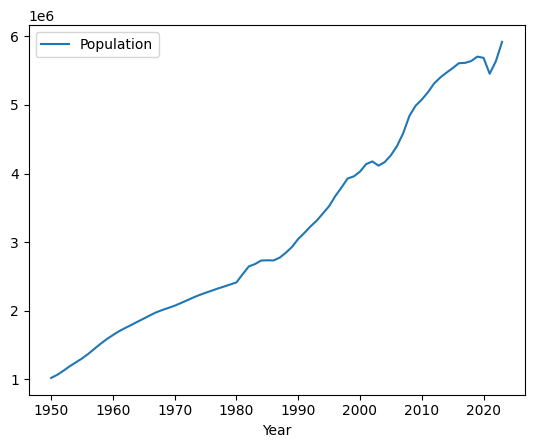

In [46]:
pop.columns = ['Year', 'Population']
pop.plot(x='Year', y='Population')

In [58]:
K = 7000000
pop['y'] = np.log(K/pop.Population - 1)
model = ols('y ~ Year', data=pop).fit()
model.params
a = np.exp(model.params['Intercept'])
b = -model.params['Year']
print(a, b)

9.343301533297555e+37 0.0439189543089948


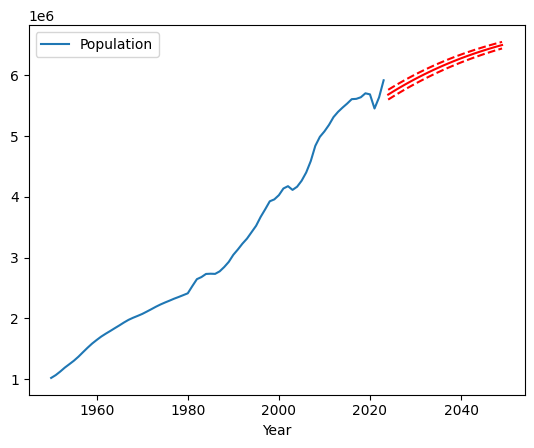

In [72]:
new_df = new_df = sm.add_constant(pd.DataFrame({'Year' : np.arange(2024, 2050)}))
model.predict(new_df, )
pred = model.get_prediction(new_df)
pop_pred = 7e6 / (1 + np.exp(pred.predicted))
pop_pred
ax = pop.plot(x='Year', y='Population')
ax.plot(new_df.Year, pop_pred, color='red')
ci_lwr = 7e6 / (1 + np.exp(pred.conf_int(alpha=0.05)[:, 0]))
ci_upr = 7e6 / (1 + np.exp(pred.conf_int(alpha=0.05)[:, 1]))
ax.plot(new_df.Year, ci_lwr, color='red', linestyle="dashed")
ax.plot(new_df.Year, ci_upr, color='red', linestyle="dashed")